# Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

**Checking data**

In [3]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

**Checking missing values**

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.285331   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702906   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.202000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))

# Train-Test Splitting

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [10]:
print(f"Rows in train set: {len(train_set)} \nRows in test set: {len(test_set)}")

Rows in train set: 404 
Rows in test set: 102


**Using Stratified_shuffle_split to train the model with different attributes of CHAS**

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [13]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [14]:
housing = strat_train_set.copy()

## Looking for Correlations

In [15]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.685267
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

**Note**:
Pearson correlation coefficient: If we increase one this then will the others things will increase or decrease (lies between -1 to +1).
Example: MEDV = 1.000000 means strong positive correlation 

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

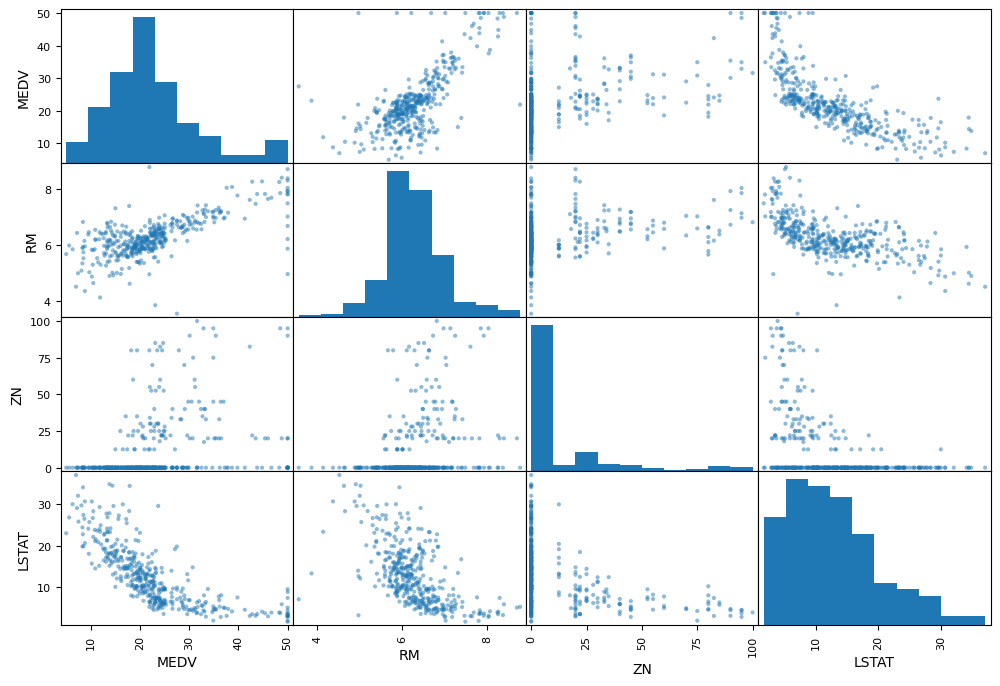

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

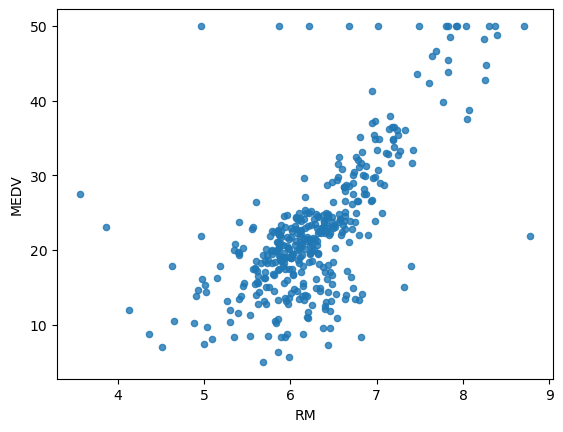

In [17]:
housing.plot(kind= "scatter", x="RM", y="MEDV", alpha= 0.8)

## Trying out Attribute combinations

In [18]:
housing["TAXRM"] = housing['TAX'] / housing['RM']

In [19]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
254  0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348  0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476  4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326  0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   

     PTRATIO       B  LSTAT  MEDV       TAXRM  
254     16.4  392.89   6.57  21.9   51.571709  
348     17.0  390.94   5.99  24.5   42.200452  
476     20.2  396.21  18.68  16.7  102.714374  
321     19.6  396.90   6.87  23.1   45.012547  
326     19.6  396.90   6.15  23.0   45.468948

In [20]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.685267
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525368
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

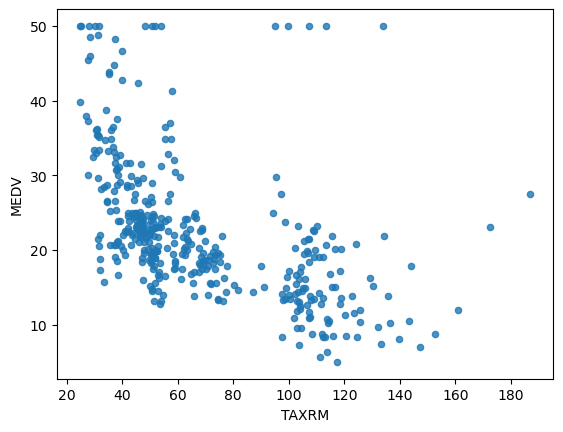

In [21]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [22]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Handling Missing Attributes

In [23]:
#a = housing.dropna(subset=["RM"]) #Option 1
#a.shape
# Note that the original housing dataframe will remain unchanged

In [24]:
#housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

In [25]:
median = housing["RM"].median() # Option 3

In [26]:
housing["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [27]:
housing.shape

(404, 13)

In [28]:
housing.describe() # before we started filling missing attributes

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  400.000000   
mean     3.602814   10.836634   11.344950    0.069307    0.558064    6.281367   
std      8.099383   22.150636    6.877817    0.254290    0.116875    0.712697   
min      0.006320    0.000000    0.740000    0.000000    0.389000    3.561000   
25%      0.086962    0.000000    5.190000    0.000000    0.453000    5.878750   
50%      0.286735    0.000000    9.900000    0.000000    0.538000    6.209000   
75%      3.731923   12.500000   18.100000    0.000000    0.631000    6.630250   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.039851    3.746210    9.735149  412.341584   18.473267  353.392822   
std     28.258248    2.099057    8.731259  168.672623    2.129243   96.069235   
min      2.900000    1.129600    1.000000  187.000000   13.000000    0.320000   
25%     44.850000    2.035975    4.000000  284.000000   17.400000  374.617500   
50%     78.200000    3.122200    5.000000  337.000000   19.000000  390.955000   
75%     94.100000    5.100400   24.000000  666.000000   20.200000  395.630000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.791609  
std      7.235740  
min      1.730000  
25%      6.847500  
50%     11.570000  
75%     17.102500  
max     36.980000

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [31]:
X = imputer.transform(housing)

In [32]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [33]:
housing_tr.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.602814   10.836634   11.344950    0.069307    0.558064    6.280651   
std      8.099383   22.150636    6.877817    0.254290    0.116875    0.709188   
min      0.006320    0.000000    0.740000    0.000000    0.389000    3.561000   
25%      0.086962    0.000000    5.190000    0.000000    0.453000    5.879750   
50%      0.286735    0.000000    9.900000    0.000000    0.538000    6.209000   
75%      3.731923   12.500000   18.100000    0.000000    0.631000    6.630000   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.039851    3.746210    9.735149  412.341584   18.473267  353.392822   
std     28.258248    2.099057    8.731259  168.672623    2.129243   96.069235   
min      2.900000    1.129600    1.000000  187.000000   13.000000    0.320000   
25%     44.850000    2.035975    4.000000  284.000000   17.400000  374.617500   
50%     78.200000    3.122200    5.000000  337.000000   19.000000  390.955000   
75%     94.100000    5.100400   24.000000  666.000000   20.200000  395.630000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.791609  
std      7.235740  
min      1.730000  
25%      6.847500  
50%     11.570000  
75%     17.102500  
max     36.980000

# Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


## Creating a Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [35]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [36]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Real Estates

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [93]:
some_data = housing.iloc[:5]

In [94]:
some_labels = housing_labels.iloc[:5]

In [95]:
prepared_data = my_pipeline.transform(some_data)

In [96]:
model.predict(prepared_data)

array([22.434, 25.194, 16.526, 23.436, 23.522])

In [97]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [98]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
MSE = mean_squared_error(housing_labels, housing_predictions)
RMSE = np.sqrt(MSE)

In [99]:
RMSE

1.216294238966284

## FINDINGS:

1. LinearRegression RMSE is 4.819
2. DecisionTreeRegressor RMSE is 0.0 which has been overffitted
3. RandomForestRegressor RMSE is 1.216

## Using better evaluation technique - Cross Validation

In [100]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
RMSE_scores = np.sqrt(-scores)

In [101]:
RMSE_scores

array([2.81039148, 2.81978637, 4.42085073, 2.52600003, 3.56137033,
       2.5467082 , 4.70649925, 3.27549958, 3.36388302, 3.47907735])

In [102]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [103]:
print_scores(RMSE_scores)

Scores: [2.81039148 2.81978637 4.42085073 2.52600003 3.56137033 2.5467082
 4.70649925 3.27549958 3.36388302 3.47907735]
Mean:  3.3510066329596
Standard deviation:  0.7035936550811983


## FINDINGS:

## Saving the model

In [104]:
from joblib import dump, load
dump(model, 'Real_Estates.joblib') 

['Real_Estates.joblib']

## Testing the model on test data

In [106]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_MSE = mean_squared_error(Y_test, final_predictions)
final_RMSE = np.sqrt(final_MSE)
print(final_predictions, list(Y_test))

[24.904 11.341 25.594 21.925 18.134 15.448 19.564 14.615 31.865 42.184
 19.499 12.231 25.16  27.159 19.547 11.152 32.075 14.449 23.82  18.405
 19.857 17.901 17.516 22.029 19.267 31.346 16.193 32.914  8.963 33.955
 23.606 21.413 23.146 10.582 21.053 11.445 44.53  24.369 23.746 41.43
 24.166 29.013 20.405 20.571 19.392 33.894 44.295 20.231 20.477 21.984
 21.429 14.649 20.659 14.846 25.116 32.994 43.005 29.029 19.406 20.679
 47.403  9.73  19.306 25.188 14.051 33.822 19.94  17.733 19.105 34.196
 26.556 22.767 21.348 22.453 34.512 12.685 16.417 19.99  20.521 21.492
 22.862 21.084 13.676 22.617 21.045 21.272 14.026 21.497 21.999 23.476
 18.274 27.314  7.462 23.367 19.166 29.625 19.732 31.923 14.635 26.874
 21.325 20.357] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [108]:
final_RMSE

2.931742714348797

In [112]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2437507 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [110]:
from joblib import dump, load
import numpy as np
model = load('Real_Estates.joblib') 


In [114]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2437507 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.434])